# Preparation


## Import Library

In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

## Import Data


In [ ]:
Kualitas_Tanah = "/content/Dataset Kualitas Tanah.csv"
Kualitas_Tanah = pd.read_csv(Kualitas_Tanah, delimiter=';', decimal=',')
Kualitas_Tanah.head ()

,Nitrogen,phosphorus,potassium,ph,"Label Kualitas,"
0,90,42,43,6.502985,Kurang Sehat
1,85,58,41,7.038096,Kurang Sehat
2,60,55,44,7.840207,Kurang Sehat
3,74,35,40,6.980401,Kurang Sehat
4,78,42,42,7.628473,Kurang Sehat


## Mengubah ke String

In [ ]:
df_cleaned = Kualitas_Tanah.astype(str) 
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Nitrogen         2200 non-null   object
 1   phosphorus       2200 non-null   object
 2   potassium        2200 non-null   object
 3   ph               2200 non-null   object
 4   Label Kualitas,  2200 non-null   object
dtypes: object(5)
memory usage: 86.1+ KB


## Mengubah Type Data


In [ ]:
#Parsing int64
df_cleaned = df_cleaned.astype({'Nitrogen': int, 'phosphorus': int, 
                                'potassium': int, 'ph': float})

df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Nitrogen         2200 non-null   int64  
 1   phosphorus       2200 non-null   int64  
 2   potassium        2200 non-null   int64  
 3   ph               2200 non-null   float64
 4   Label Kualitas,  2200 non-null   object 
dtypes: float64(1), int64(3), object(1)
memory usage: 86.1+ KB


## Mengganti Value Label (Label Kualitas,)

In [ ]:
df_cleaned = df_cleaned.replace('Tidak Sehat', 0)
df_cleaned = df_cleaned.replace('Kurang Sehat', 1)
df_cleaned = df_cleaned.replace('Sehat', 2)


df_cleaned

,Nitrogen,phosphorus,potassium,ph,"Label Kualitas,"
0,90,42,43,6.502985,1
1,85,58,41,7.038096,1
2,60,55,44,7.840207,1
3,74,35,40,6.980401,1
4,78,42,42,7.628473,1
...,...,...,...,...,...
2195,107,34,32,6.780064,1
2196,99,15,27,6.086922,0
2197,118,33,30,6.362608,1
2198,117,32,34,6.758793,1


In [ ]:
Kualitas_Tanah = df_cleaned
Kualitas_Tanah

,Nitrogen,phosphorus,potassium,ph,"Label Kualitas,"
0,90,42,43,6.502985,1
1,85,58,41,7.038096,1
2,60,55,44,7.840207,1
3,74,35,40,6.980401,1
4,78,42,42,7.628473,1
...,...,...,...,...,...
2195,107,34,32,6.780064,1
2196,99,15,27,6.086922,0
2197,118,33,30,6.362608,1
2198,117,32,34,6.758793,1


## Melihat Missing

In [ ]:
# dalam dataset ini terdapat value kosong seperti "---", maka terlebih dahulu kita tanti dengan null
Kualitas_Tanah = Kualitas_Tanah.replace('---', np.nan)
Kualitas_Tanah = Kualitas_Tanah.replace('nan', np.nan)
Kualitas_Tanah = Kualitas_Tanah.replace('TIDAK ADA DATA', np.nan)

Kualitas_Tanah.isnull().sum()

Nitrogen           0
phosphorus         0
potassium          0
ph                 0
Label Kualitas,    0
dtype: int64

## Mendeteksi Outlier

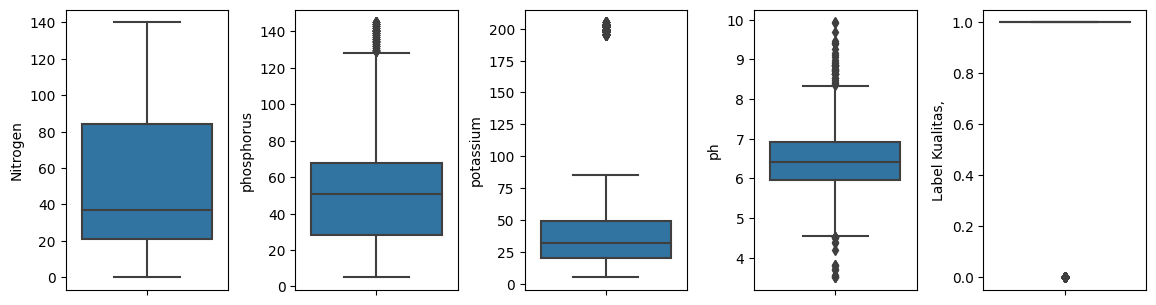

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, axes = plt.subplots(1, 5, figsize=(11.5, 3))
count = 0
axes = axes.flatten()

for i, value in Kualitas_Tanah.items():
    sns.boxplot(ax=axes[count], y=i, data=Kualitas_Tanah)
    count += 1

plt.tight_layout(pad=0.5, h_pad=3, w_pad=0.8)

In [ ]:
Q1 = Kualitas_Tanah.quantile(0.25)
Q3 = Kualitas_Tanah.quantile(0.75)
IQR = Q3 - Q1
Kualitas_Tanah= Kualitas_Tanah[~((Kualitas_Tanah < (Q1 - 1.5*IQR)) | (Kualitas_Tanah > (Q3 + 1.5*IQR))).any(axis=1)]
Kualitas_Tanah.shape

(1558, 5)

In [ ]:
Kualitas_Tanah

,Nitrogen,phosphorus,potassium,ph,"Label Kualitas,"
0,90,42,43,6.502985,1
1,85,58,41,7.038096,1
2,60,55,44,7.840207,1
3,74,35,40,6.980401,1
4,78,42,42,7.628473,1
...,...,...,...,...,...
2194,97,35,26,6.334610,1
2195,107,34,32,6.780064,1
2197,118,33,30,6.362608,1
2198,117,32,34,6.758793,1


In [ ]:
Kualitas_Tanah.to_csv('DataKualitasTanahCLEAN.csv', index=False)

# Build Model

## Encoding 

In [ ]:
data1 = "/content/DataKualitasTanahCLEAN.csv"
data1 = pd.read_csv(data1)
data1.head ()

,Nitrogen,phosphorus,potassium,ph,"Label Kualitas,"
0,90,42,43,6.502985,1
1,85,58,41,7.038096,1
2,60,55,44,7.840207,1
3,74,35,40,6.980401,1
4,78,42,42,7.628473,1


In [ ]:
encoder = LabelEncoder()

In [ ]:
X = data1.iloc[:,:-1]
y = data1.iloc[:,-1:]
X

,Nitrogen,phosphorus,potassium,ph
0,90,42,43,6.502985
1,85,58,41,7.038096
2,60,55,44,7.840207
3,74,35,40,6.980401
4,78,42,42,7.628473
...,...,...,...,...
1553,97,35,26,6.334610
1554,107,34,32,6.780064
1555,118,33,30,6.362608
1556,117,32,34,6.758793


In [ ]:
y

,"Label Kualitas,"
0,1
1,1
2,1
3,1
4,1
...,...
1553,1
1554,1
1555,1
1556,1


In [ ]:
encoder.fit(y)
y = encoder.transform(y)
y = tf.keras.utils.to_categorical(y)
y

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]], dtype=float32)

## Split Data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape

(1246, 4)

In [ ]:
X_test.shape

(312, 4)

## Model Squential

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, input_dim = 4 ,activation = "relu"),
    tf.keras.layers.Dense(32,activation = "relu"),
    tf.keras.layers.Dense(16,activation = "relu"),
    tf.keras.layers.Dense(8,activation = "relu"),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(1, activation = "sigmoid")
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 64)                320       
                                                                 
 dense_6 (Dense)             (None, 32)                2080      
                                                                 
 dense_7 (Dense)             (None, 16)                528       
                                                                 
 dense_8 (Dense)             (None, 8)                 136       
                                                                 
 dropout_1 (Dropout)         (None, 8)                 0         
                                                                 
 dense_9 (Dense)             (None, 1)                 9         
                                                                 
Total params: 3,073
Trainable params: 3,073
Non-traina

## Model Compile

In [ ]:
model.compile(loss = "binary_crossentropy",
              optimizer = "adam",
              metrics = "accuracy")

In [ ]:
history = model.fit(X_train,y_train,validation_data = (X_test, y_test),epochs = 200,
                    batch_size = 4,verbose = 2)

Epoch 1/200
312/312 - 2s - loss: 0.0397 - accuracy: 0.9799 - val_loss: 2.7604e-05 - val_accuracy: 1.0000 - 2s/epoch - 7ms/step
Epoch 2/200
312/312 - 1s - loss: 0.0104 - accuracy: 1.0000 - val_loss: 2.0233e-06 - val_accuracy: 1.0000 - 679ms/epoch - 2ms/step
Epoch 3/200
312/312 - 1s - loss: 0.0089 - accuracy: 1.0000 - val_loss: 2.0534e-07 - val_accuracy: 1.0000 - 702ms/epoch - 2ms/step
Epoch 4/200
312/312 - 1s - loss: 0.0119 - accuracy: 0.9984 - val_loss: 3.0294e-10 - val_accuracy: 1.0000 - 657ms/epoch - 2ms/step
Epoch 5/200
312/312 - 1s - loss: 0.0057 - accuracy: 1.0000 - val_loss: 2.0771e-10 - val_accuracy: 1.0000 - 720ms/epoch - 2ms/step
Epoch 6/200
312/312 - 1s - loss: 0.0069 - accuracy: 1.0000 - val_loss: 1.4710e-10 - val_accuracy: 1.0000 - 706ms/epoch - 2ms/step
Epoch 7/200
312/312 - 1s - loss: 0.0067 - accuracy: 1.0000 - val_loss: 1.2145e-10 - val_accuracy: 1.0000 - 709ms/epoch - 2ms/step
Epoch 8/200
312/312 - 1s - loss: 0.0122 - accuracy: 1.0000 - val_loss: 8.4783e-11 - val_accur

In [ ]:
# Melihat akurasi dari riwayat pelatihan
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

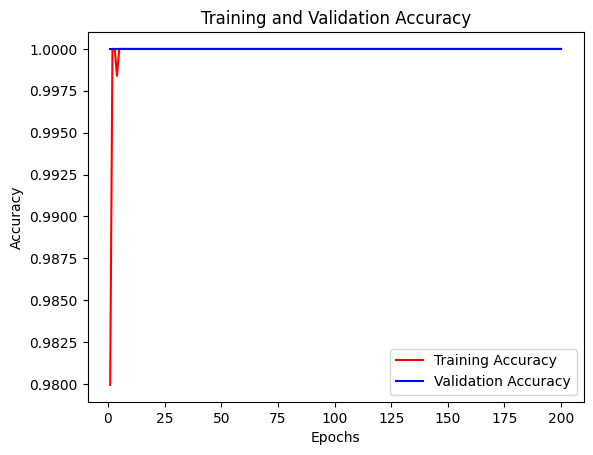

In [ ]:
# Melihat grafik akurasi pelatihan dan validasi
epochs = range(1, len(train_accuracy) + 1)
plt.plot(epochs, train_accuracy, 'r', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Deployment

## Tensorflowlite

In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
#converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_model = converter.convert()

In [ ]:
tflite_model_file = 'Soil.tflite'

with open(tflite_model_file, "wb") as f:
    f.write(tflite_model)

###Predict test

In [ ]:
with open("Soil.tflite", 'rb') as fid:
    tflite_model = fid.read()
    
interpreter = tf.lite.Interpreter(model_content=tflite_model)
interpreter.allocate_tensors()

In [ ]:
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [ ]:
input_data = np.array([[78.0,80.0,88.0,53.0]])  # Include values for all 8 input features


In [ ]:
#classification function
def classify_Soil_tflite(model_path, data): #model_path:lokasi tflitenya, data = array isinya variabelnya
    # Load the TFLite model
    interpreter = tf.lite.Interpreter(model_path=model_path)
    interpreter.allocate_tensors()

    # Get input and output details
    input_details = interpreter.get_input_details()
    output_details = interpreter.get_output_details()
    
    #convert data type to float32
    data = data.astype(np.float32)

    # Set the input tensor data
    interpreter.set_tensor(input_details[0]['index'], data)

    # Run inference
    interpreter.invoke()

    # Get the output tensor data
    predictions = interpreter.get_tensor(output_details[0]['index'])

    # Convert predictions to class labels
    predicted_classes = np.argmax(predictions, axis=1)

    return predicted_classes

In [ ]:
model_path = '/content/Soil.tflite'
input_data = np.array([[25,25,25,25]])  # Include values for all 4 input features
input_data = input_data.astype(np.float32)
predicted_classes = classify_Soil_tflite(model_path, input_data)

print(predicted_classes)

[0]


In [ ]:
from google.colab import files
files.download("Soil.tflite")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## H5

In [ ]:
model.save("/content/Soil.h5")

### Predict Test

In [ ]:
data_dummy = np.array([[45,42,78,98]])

In [ ]:
np.argmax(model.predict(data_dummy))

1/1 [==============================] - 1s 589ms/step


0

In [ ]:
def Soil(data):
  pred = np.argmax(model.predict(data))

  if pred == 0:
    label  = "Tidak Sehat"
  elif pred == 1:
    label  = "Kurang Sehat"
  elif pred == 2:
    label  = "Sehat"

  
  return label


In [ ]:
Soil(data_dummy)

1/1 [==============================] - 0s 79ms/step


'Tidak Sehat'